### 목표
- iris 데이터를 활용해서 붓꽃 품종을 분류해보자.
- 신경망에서 다중 분류 학습을 진행해보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
data 
# 딕셔너리 -> 접근 : 딕셔너리['키']
# 번치객체 bunch 다발 묶음

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# 키값들 확인하기
data.keys()

# target 답
# data 문제 = 특성 = 속성 = 피처
# target_names 답데이터 이름
# feature_names 특성 이름
# DESCR 묘사하다, 기술하다 : 데이터의 정보

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# 답데이터 살펴보기
data.target

# 분류 종류 3가지 - 0-'setosa', 1-'versicolor', 2-'virginica'
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# 문제데이터 살펴보기
data.data.shape

# 피처 이름들 살펴보기
data.feature_names

# 'sepal length (cm)', 꽃받침의 길이
# 'sepal width (cm)', 꽃받침의 너비
# 'petal length (cm)', 꽃잎의 길이
# 'petal width (cm)' 꽃잎의 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### 데이터 분리
- 문제와 답으로 분리
- 훈련용, 테스트용으로 분리

In [6]:
# 문제
X = data.data
# 답
y = data.target
# X_train, X_test, y_train, y_test
# 8:2
# 고정값 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state = 3)
# 크기확인
print('훈련문제', X_train.shape)
print('훈련답', X_test.shape)
print('테스트문제', y_train.shape)
print('테스트답', y_test.shape)

훈련문제 (120, 4)
훈련답 (30, 4)
테스트문제 (120,)
테스트답 (30,)


#### 답데이터 원핫인코딩

In [7]:
# pd.get_dummies(대상) --> pandas
# to_categorical(대상) --> tensorflow
from tensorflow.keras.utils import to_categorical

# train
y_tr_oh = to_categorical(y_train)
# test
y_te_oh = to_categorical(y_test)

In [8]:
# 원핫인코딩 됐는지 확인
y_tr_oh

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

In [9]:
y_te_oh

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

#### 인공신경망 생성하기!
- 1. 신경망 구조 설계(뼈대, 층 정의)
- 2. 학습/평가 방법 설정
- 3. 학습 및 시각화
- 4. 모델 평가 및 예측

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# 1. 뼈대 생성
model = Sequential()
# 2. 입력 + 중간층 설정
# 뉴런개수 16
# relu
model.add(Dense(units = 16, input_dim = 4, activation = 'relu'))
# 중간층 2개
# 뉴런개수 32
# 뉴런개수 10
# relu
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
# 출력층
# 다중분류 : 출력층의 뉴런의 개수는 몇개? 활성화함수 이름?
# 다중분류 : 클래스 레이블의 개수만큼
# 활성화함수 : softmax
model.add(Dense(units = 3, activation = 'softmax'))
# 요약
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 987
Trainable params: 987
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 2. 학습/평가방법 (모델 컴파일)
# compile
# 다중분류 loss : categorical_crossentropy
model.compile(loss = 'categorical_crossentropy', # 에러 측정(실제와 예측 차이 측정)
                     optimizer = 'adam', # 최적화 : 확률적 경사 하강법
                     metrics = ['accuracy'] ) # 평가 지표 : 정확도

In [15]:
# 3-1. 학습 fit
h = model.fit(X_train, y_tr_oh, epochs=150)

Epoch 1/150
4/4 [==============================] - 0s 505us/step - loss: 0.0597 - accuracy: 0.9917
Epoch 2/150
4/4 [==============================] - 0s 497us/step - loss: 0.0608 - accuracy: 0.9917
Epoch 3/150
4/4 [==============================] - 0s 499us/step - loss: 0.0584 - accuracy: 0.9917
Epoch 4/150
4/4 [==============================] - 0s 499us/step - loss: 0.0618 - accuracy: 0.9917
Epoch 5/150
4/4 [==============================] - 0s 748us/step - loss: 0.0568 - accuracy: 0.9917
Epoch 6/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0596 - accuracy: 0.9917
Epoch 7/150
4/4 [==============================] - 0s 998us/step - loss: 0.0603 - accuracy: 0.9917
Epoch 8/150
4/4 [==============================] - 0s 749us/step - loss: 0.0572 - accuracy: 0.9917
Epoch 9/150
4/4 [==============================] - 0s 499us/step - loss: 0.0598 - accuracy: 0.9917
Epoch 10/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0577 - accuracy: 0.9917
Epoch 11/150


4/4 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9917
Epoch 84/150
4/4 [==============================] - 0s 748us/step - loss: 0.0561 - accuracy: 0.9917
Epoch 85/150
4/4 [==============================] - 0s 499us/step - loss: 0.0537 - accuracy: 0.9917
Epoch 86/150
4/4 [==============================] - 0s 499us/step - loss: 0.0530 - accuracy: 0.9917
Epoch 87/150
4/4 [==============================] - 0s 499us/step - loss: 0.0526 - accuracy: 0.9917
Epoch 88/150
4/4 [==============================] - 0s 499us/step - loss: 0.0522 - accuracy: 0.9917
Epoch 89/150
4/4 [==============================] - 0s 748us/step - loss: 0.0533 - accuracy: 0.9917
Epoch 90/150
4/4 [==============================] - 0s 743us/step - loss: 0.0527 - accuracy: 0.9917
Epoch 91/150
4/4 [==============================] - 0s 748us/step - loss: 0.0523 - accuracy: 0.9917
Epoch 92/150
4/4 [==============================] - 0s 747us/step - loss: 0.0526 - accuracy: 0.9917
Epoch 93/150
4/

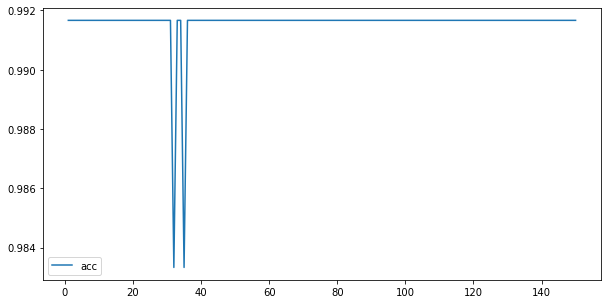

In [21]:
# 3-2. 선그래프 시각화
plt.figure(figsize = (10,5))
plt.plot(range(1,151), h.history['accuracy'], label='acc')
plt.legend()
plt.show()

In [24]:
# 4. 평가 및 예측
pre = model.predict(X_test)
# 각각의 클래스에 대한 확률정보가 출력됨
pre[0].argmax() # 제일 큰값이 있는 인덱스 번호 출력 함수
# setosa품종으로 예측했음을 알 수 있음

0